In [6]:
# Cell 1: Imports and setup
import json
import random
from collections import Counter, defaultdict
import pandas as pd

LOG_FILE = r"C:\Users\AHMED\Desktop\new-approch\dataset\data-for-train-llm\data.jsonl"  # Change to your merged logs path
SAMPLE_SIZE = 500000  # Number of logs to sample for fast analysis (adjust as needed)


In [7]:
logs = []
with open(LOG_FILE, "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= SAMPLE_SIZE:
            break
        logs.append(json.loads(line))

print(f"Loaded {len(logs)} log records.")

Loaded 500000 log records.


In [8]:
for _ in range(3):
    log = random.choice(logs)
    print(json.dumps(log, indent=2), "\n---")

{
  "SourceName": "Microsoft-Windows-Sysmon",
  "ProviderGuid": "{5770385f-c22a-43e0-bf4c-06f5698ffbd9}",
  "Level": "4",
  "Keywords": "0x8000000000000000",
  "Channel": "Microsoft-Windows-Sysmon/Operational",
  "Hostname": "DC01.pandalab.com",
  "TimeCreated": "2023-07-19T12:22:01.882Z",
  "@timestamp": "2023-07-19T12:22:01.882Z",
  "EventID": 10,
  "Message": "Process accessed:\r\nRuleName: -\r\nUtcTime: 2023-07-19 19:22:01.871\r\nSourceProcessGUID: {fe86be69-25d2-64b6-2000-000000001000}\r\nSourceProcessId: 1244\r\nSourceThreadId: 1348\r\nSourceImage: C:\\Windows\\System32\\VBoxService.exe\r\nTargetProcessGUID: {fe86be69-0884-64b8-0403-000000001000}\r\nTargetProcessId: 2776\r\nTargetImage: C:\\Windows\\system32\\WindowsPowerShell\\v1.0\\PowerShell_ISE.exe\r\nGrantedAccess: 0x1400\r\nCallTrace: C:\\Windows\\SYSTEM32\\ntdll.dll+9f934|C:\\Windows\\System32\\KERNELBASE.dll+44a5e|C:\\Windows\\System32\\VBoxService.exe+13bad|C:\\Windows\\System32\\VBoxService.exe+13a04|C:\\Windows\\System

In [9]:
# Cell 4: Explore available fields/keys and their frequencies
key_counter = Counter()
for log in logs:
    key_counter.update(log.keys())

print("Field/Key frequencies:")
for k, v in key_counter.most_common():
    print(f"{k}: {v}")

# You can also get unique fields:
all_keys = set()
for log in logs:
    all_keys.update(log.keys())
print("\nAll unique keys in the logs:", all_keys)


Field/Key frequencies:
Channel: 500000
EventID: 495089
Task: 495089
Hostname: 495089
Keywords: 494482
SourceName: 493725
@timestamp: 489571
ProviderGuid: 468780
Message: 424943
UtcTime: 391031
RuleName: 389989
TimeCreated: 265404
Level: 259886
EventType: 259564
RecordNumber: 239507
ProcessId: 239388
SeverityValue: 234596
host: 234596
ThreadID: 234596
EventTime: 234596
EventReceivedTime: 234596
SourceModuleType: 234596
port: 234596
@version: 234596
SourceModuleName: 234596
Severity: 234596
ExecutionProcessID: 232961
tags: 232961
OpcodeValue: 216296
Version: 216296
Opcode: 210957
Category: 210693
SourceProcessId: 209740
TargetProcessId: 209740
SourceImage: 202065
TargetImage: 202065
SourceProcessGUID: 202054
GrantedAccess: 202054
SourceThreadId: 202054
TargetProcessGUID: 202054
CallTrace: 202054
ProcessGuid: 188962
Image: 188962
AccountName: 172277
AccountType: 172273
UserID: 172273
Domain: 172273
TargetObject: 128518
SourceUser: 114583
TargetUser: 114583
EventTypeOrignal: 79968
User: 65

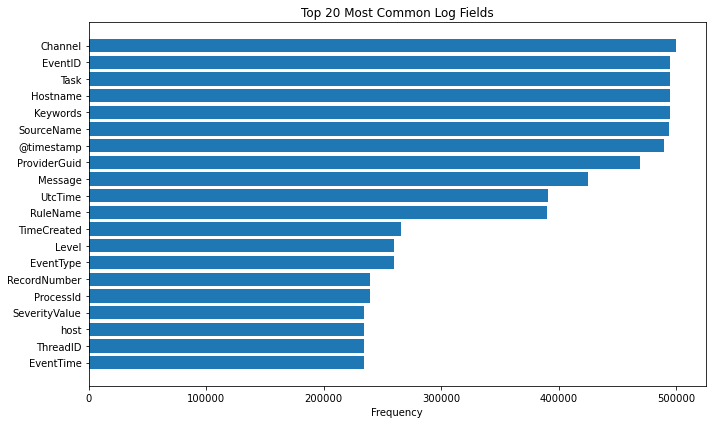

In [10]:
import matplotlib.pyplot as plt

# Plot the frequencies of the top 20 most common keys
top_keys = key_counter.most_common(20)
keys, counts = zip(*top_keys)

plt.figure(figsize=(10, 6))
plt.barh(keys[::-1], counts[::-1])
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Log Fields')
plt.tight_layout()
plt.show()

In [13]:
df = pd.DataFrame(logs)
print("Shape:", df.shape)
df.head()

Shape: (500000, 395)


,RecordNumber,EventRecordId,TimeCreated,EventId,Level,Provider,Channel,ProcessId,ThreadId,Computer,...,MaxRunspaces,MinRunspaces,Port,ReasonCode,ModifyingUser,ApplicationPath,IPVersion,Profiles,Hash,Contents
0,1.0,1025.0,2019-05-23 17:45:34.5382961,1.0,Info,Microsoft-Windows-Sysmon,Microsoft-Windows-Sysmon/Operational,2032,2092.0,IEWIN7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1026.0,2019-05-23 17:46:04.6716257,1.0,Info,Microsoft-Windows-Sysmon,Microsoft-Windows-Sysmon/Operational,2032,2092.0,IEWIN7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1027.0,2019-05-23 17:46:05.0221297,13.0,Info,Microsoft-Windows-Sysmon,Microsoft-Windows-Sysmon/Operational,2032,2092.0,IEWIN7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,5278.0,2019-02-13 15:14:52.4097344,4624.0,LogAlways,Microsoft-Windows-Security-Auditing,Security,480,1716.0,PC02.example.corp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,5281.0,2019-02-13 15:15:04.1752848,4624.0,LogAlways,Microsoft-Windows-Security-Auditing,Security,480,484.0,PC02.example.corp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


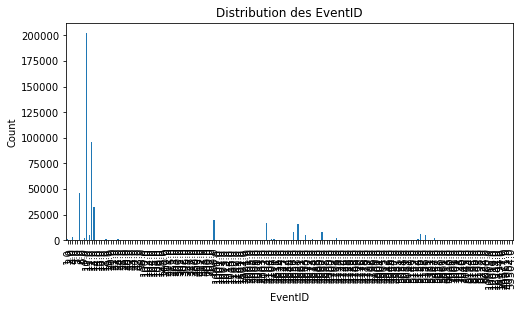

In [14]:
if "EventID" in df.columns:
    plt.figure(figsize=(8,4))
    df["EventID"].value_counts().sort_index().plot(kind="bar")
    plt.title("Distribution des EventID")
    plt.xlabel("EventID")
    plt.ylabel("Count")
    plt.show()


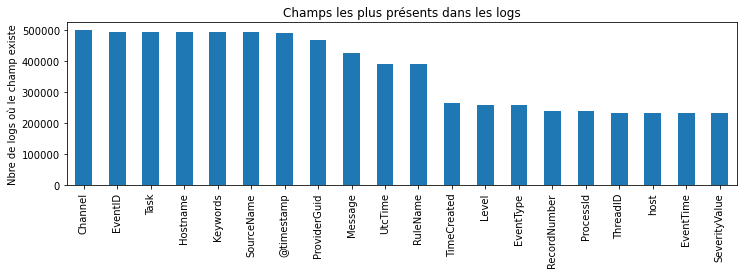

In [15]:
field_counts = df.notnull().sum().sort_values(ascending=False)
plt.figure(figsize=(12,3))
field_counts.head(20).plot(kind='bar')
plt.title("Champs les plus présents dans les logs")
plt.ylabel("Nbre de logs où le champ existe")
plt.show()


In [16]:
df["missing_fields"] = df.isnull().sum(axis=1)
print("Logs avec le plus de champs manquants :")
print(df.sort_values("missing_fields", ascending=False).head())

# (Idée : filtrer les logs qui n'ont presque aucune info utile)


Logs avec le plus de champs manquants :
        RecordNumber  EventRecordId              TimeCreated  EventId Level  \
165814           NaN            NaN  2020-10-18 02:17:00.214      NaN   NaN   
380392           NaN            NaN  2020-10-19 12:28:23.974      NaN   NaN   
360678           NaN            NaN  2020-10-21 12:19:01.151      NaN   NaN   
379679           NaN            NaN  2020-10-19 12:28:23.942      NaN   NaN   
421278           NaN            NaN  2020-10-19 03:30:41.150      NaN   NaN   

       Provider   Channel ProcessId  ThreadId Computer  ...  MinRunspaces  \
165814      NaN  Security       NaN       NaN      NaN  ...           NaN   
380392      NaN    System       NaN       NaN      NaN  ...           NaN   
360678      NaN    System       NaN       NaN      NaN  ...           NaN   
379679      NaN  Security       NaN       NaN      NaN  ...           NaN   
421278      NaN    System       NaN       NaN      NaN  ...           NaN   

       Port ReasonCode